In [1]:
import numpy as np
import pandas as pd
import utils2 as utils
import matplotlib.pyplot as plt



In [2]:
# Define beam energy and matrix (copy matrix from quad optimization)
energy = 80e6 #eV

beam_matrix = np.array([[ 3.17739889e-07,  2.07886505e-08,  0.00000000e+00,
         0.00000000e+00],
       [ 2.07886505e-08,  6.36261433e-08,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.76773481e-07,
        -4.06615910e-08],
       [ 0.00000000e+00,  0.00000000e+00, -4.06615910e-08,
         5.62010049e-08]])


# Setup beamline
rigidity = energy/299792458
beamline = utils.Beamline(rigidity)
Is = np.zeros(5)





Triplet Currents: [ 4.4   -3.432  4.4    0.    -0.   ]
Triplet Currents: [ 4.4   -3.432  4.4    0.    -0.   ]
0.0003890933602001367


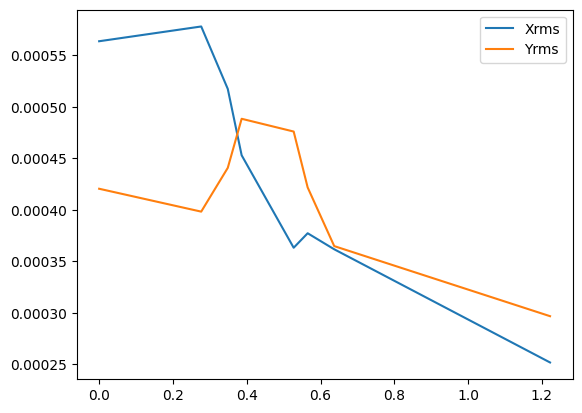

In [13]:
# Tweak triplet settings manually
asym = .22
strength = 4.4
Is[:3] = np.array([1, -1+asym, 1])*strength
print(f'Triplet Currents: {Is}')

# Tweak doublet settings manually
asym = .08
strength = 0
Is[3:] = np.array([1+asym, -1+asym])*strength
print(f'Triplet Currents: {Is}')

# Compute spotsizes along beamline
beamline.updateCurrents(Is)
zs, xs, ys = beamline.computeSpotsizes(beam_matrix)

plt.plot(zs, xs, label='Xrms')
plt.plot(zs, ys, label='Yrms')
plt.legend()
print(np.sqrt(xs[-1]**2 + ys[-1]**2))

---- Final Error-----
61260.4
----Quad Currents----
Q0 = 3.23A
Q1 = -3.61A
Q2 = 5.54A
Q3 = 0.00A
Q4 = 0.00A


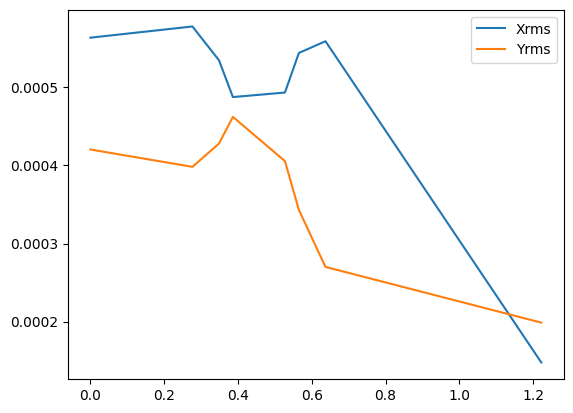

In [4]:
quad_optimizer = utils.QuadOptimizer(beamline, beam_matrix)

quad_optimizer.run()